In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.datasets import load_boston

In [39]:
load_boston = load_boston()

In [40]:
x=load_boston.data
y=load_boston.target

In [41]:
data=pd.DataFrame(x,columns=load_boston.feature_names)

In [42]:
data['Sales_price']=y

In [43]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Sales_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [44]:
data.nunique()

CRIM           504
ZN              26
INDUS           76
CHAS             2
NOX             81
RM             446
AGE            356
DIS            412
RAD              9
TAX             66
PTRATIO         46
B              357
LSTAT          455
Sales_price    229
dtype: int64

C:\Users\personal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_price', ylabel='Density'>

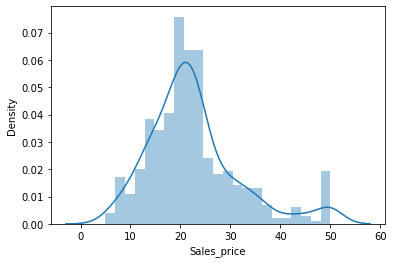

In [45]:
sns.distplot(data.Sales_price)

In [46]:
print('Skewness: ',data['Sales_price'].skew())
print('kurtoises: ',data['Sales_price'].kurt())

Skewness:  1.1080984082549072
kurtoises:  1.495196944165818


In [47]:
print('Skewness: %f'%data['Sales_price'].skew())
print('kurtoises: %f'%data['Sales_price'].kurt())

Skewness: 1.108098
kurtoises: 1.495197


C:\Users\personal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE', ylabel='Sales_price'>

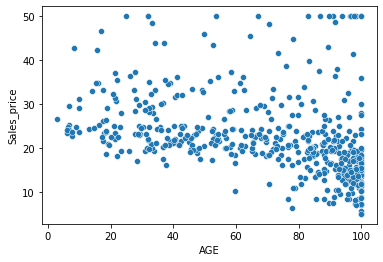

In [48]:
sns.scatterplot(data.AGE, data.Sales_price)

C:\Users\personal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CRIM', ylabel='Sales_price'>

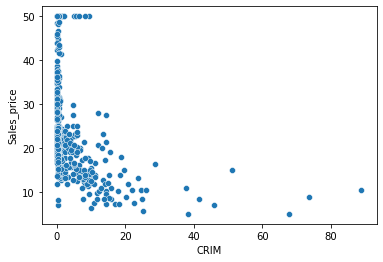

In [49]:
sns.scatterplot(data.CRIM, data.Sales_price)

In [50]:
data.Sales_price= np.log1p(data.Sales_price)

In [51]:
data.Sales_price

0      3.218876
1      3.117950
2      3.575151
3      3.538057
4      3.616309
         ...   
501    3.152736
502    3.072693
503    3.214868
504    3.135494
505    2.557227
Name: Sales_price, Length: 506, dtype: float64

C:\Users\personal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_price', ylabel='Density'>

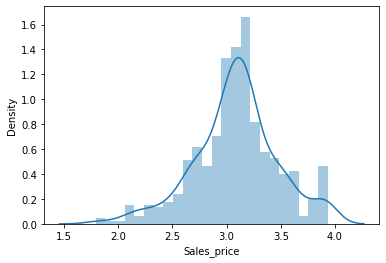

In [52]:
sns.distplot(data.Sales_price)

<AxesSubplot:>

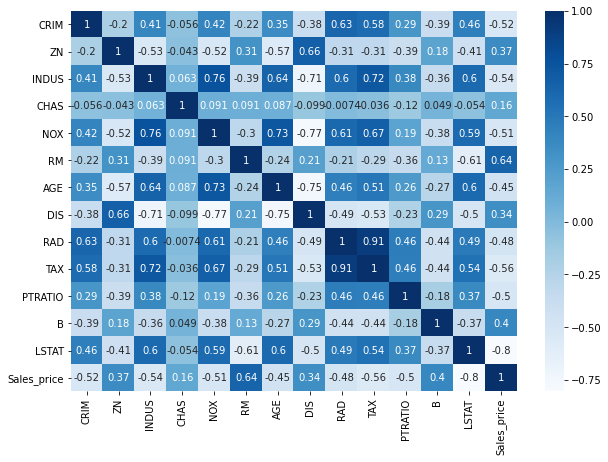

In [67]:
cor=data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(cor,annot=True,cmap='Blues')

In [54]:
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Sales_price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.520692
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.365136
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.541258
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.159435
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.508900
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.637387
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.452150
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.339744
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.478488
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.558832


In [68]:
cor_target=abs(cor.Sales_price) # absolute  value of the correlation

In [72]:
relevant_target= cor_target[cor_target > 0.2] # filtering and getting the highly correlated features

names=[index for index, value in relevant_target.iteritems()] # getting the names of the relevant features

In [74]:
names.pop()

'Sales_price'

In [79]:
print(len(names))
print(names)

12
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [129]:
data=data.drop(columns=['AGE','INDUS'])

##  Model Building

In [80]:
from sklearn.model_selection import train_test_split

In [130]:
x=data.drop('Sales_price',axis=1)
y=data.Sales_price

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
model =LinearRegression()

In [134]:
model.fit(x_train,y_train)

LinearRegression()

In [135]:
predictions=model.predict(x_test)

In [136]:
predictions[0]

3.3830424924500813

In [146]:
al=pd.DataFrame(np.exp(predictions),columns=['predictions'])

In [147]:
al

,predictions
0,29.460268
1,37.932154
2,15.842636
3,26.256064
4,18.025380
...,...
97,7.813668
98,13.611967
99,14.471621
100,22.796162


In [148]:
al['Target']=np.exp(y_test)

In [151]:
al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   predictions  102 non-null    float64
 1   Target       28 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [96]:
predictions

array([3.36689498, 3.63981813, 2.77405053, 3.28521245, 2.89204877,
       3.14855654, 2.90989604, 2.70934849, 3.10765839, 3.02690015,
       3.17517887, 2.96651727, 1.69187907, 3.09867643, 3.03443055,
       3.18049519, 3.0420287 , 2.33503329, 3.75530564, 2.82961267,
       3.33703143, 3.41641256, 2.64277655, 3.16968538, 2.86755109,
       2.81367827, 3.17690968, 2.6472422 , 3.08848134, 2.98937208,
       3.12449531, 3.25161792, 3.06333439, 2.95814859, 2.8088078 ,
       2.87134704, 3.46722972, 3.07725702, 3.1513821 , 3.24337672,
       2.76104716, 3.47225368, 3.82434052, 2.96258466, 3.30436996,
       2.84879457, 2.77441924, 3.28888779, 2.9788107 , 3.4214278 ,
       3.0927689 , 3.58805458, 2.82572907, 3.2473013 , 3.74083997,
       3.10584304, 2.89930457, 3.51472754, 3.23292667, 2.76507071,
       3.13600605, 3.41802256, 3.49497936, 2.89759764, 3.07269958,
       2.86353031, 2.9303843 , 3.28590654, 3.44229605, 2.59727969,
       3.06655554, 3.2776904 , 2.52399189, 2.93013977, 3.18851

In [138]:
score=model.score(x_train,y_train)*100
score

79.58358981637787

In [140]:
a1=data.drop('Sales_price',axis=1)
b=data.Sales_price

In [141]:
a=sm.add_constant(a1)
result=sm.OLS(b,a).fit()

In [142]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Sales_price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     168.7
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          2.16e-159
Time:                        17:17:50   Log-Likelihood:                 157.45
No. Observations:                 506   AIC:                            -290.9
Df Residuals:                     494   BIC:                            -240.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0643      0.192     21.173      0.000       3.687       4.441
CRIM          -0.0094      0.001     -7.559      0.000      -0.012      -0.007
ZN             0.0011      0.001      2.112      0.035    7.53e-05       0.002
CHAS           0.1004      0.032      3.102      0.002       0.037       0.164
NOX           -0.6928      0.134     -5.174      0.000      -0.956      -0.430
RM             0.0899      0.015      5.839      0.000       0.060       0.120
DIS           -0.0498      0.007     -7.083      0.000      -0.064      -0.036
RAD            0.0128      0.002      5.311      0.000       0.008       0.017
TAX           -0.0005      0.000     -4.142      0.000      -0.001      -0.000
PTRATIO       -0.0359      0.005     -7.341      0.000      -0.045      -0.026
B              0.0004      0.000      3.912      0.000       0.000       0.001
LSTAT         -0.0269      0.002    -14.972      0.000      -0.030      -0.023
==============================================================================
Omnibus:                       64.996   Durbin-Watson:                   1.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.707
Skew:                           0.547   Prob(JB):                     3.58e-50
Kurtosis:                       6.099   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""